In [202]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas
import numpy as np

In [88]:
df=pd.read_csv('apple_data.csv')
th=df[df['country'] == 'Thailand']
bkk=th[th['region'] == 'Bangkok']

/Users/porames/opt/anaconda3/envs/env/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [279]:
df[(df['geo_type'] == 'country/region') & (df['region'] == 'Thailand')]

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2021-07-19,2021-07-20,2021-07-21,2021-07-22,2021-07-23,2021-07-24,2021-07-25,2021-07-26,2021-07-27,2021-07-28
135,country/region,Thailand,driving,ประเทศไทย,NaN,NaN,100.0,100.25,106.9,106.81,...,37.81,36.56,37.08,37.58,40.7,38.52,38.24,38.87,39.78,38.11
136,country/region,Thailand,walking,ประเทศไทย,NaN,NaN,100.0,100.01,107.0,107.51,...,31.01,31.25,29.79,30.10,32.5,31.61,31.33,31.52,31.69,30.97


In [280]:
th_avg=df[(df['geo_type'] == 'country/region') & (df['region'] == 'Thailand')].iloc[:,7:-1]
th_avg=th_avg.transpose()
jun=th_avg[(th_avg.index>='2021-06-01') & (th_avg.index<'2021-07-01')].mean()[135]
jul=th_avg[(th_avg.index>='2021-07-01') & (th_avg.index<'2021-08-01')].mean()[135]
(jul-jun)*100/jun

-27.397276860579865

In [92]:
th=th.groupby(['region','transportation_type']).sum()
th=th.transpose()

In [155]:
provinces = []
for col in th.columns:
    provinces.append(col[0])
provinces = np.unique(provinces)

In [209]:
provinces_changes=[]
for name in provinces:
    province=th[name]
    driving_jun = province[(province.index>='2021-06-01') & (province.index<'2021-07-01')]['driving'].mean()
    driving_jul = province[(province.index>='2021-07-01')]['driving'].mean()
    #walking_jun = province[(province.index>='2021-06-01') & (province.index<'2021-07-01')]['walking'].mean()
    #walking_jul = province[(province.index>='2021-07-01')]['driving'].mean()
    delta = ((driving_jul-driving_jun)*100/driving_jun)
    if(abs(delta)>=0):
        data = {'province':name.replace(' Province', ''), 'delta': delta}
        provinces_changes.append(data)
provinces_changes=pd.DataFrame(provinces_changes).fillna(0)
provinces_changes['province']=provinces_changes['province'].str.upper()
provinces_changes

<ipython-input-209-85b701c4d0d3>:8: RuntimeWarning: invalid value encountered in double_scalars
  delta = ((driving_jul-driving_jun)*100/driving_jun)


,province,delta
0,ANG THONG,-29.977096
1,BANGKOK,-27.519487
2,BURI RAM,-27.958294
3,CHACHOENGSAO,-33.490606
4,CHAI NAT,-35.702133
...,...,...
56,TAK,-34.958910
57,TRANG,-13.075133
58,TRAT,-29.823244
59,UBON RATCHATHANI,-22.181168


In [210]:
gdf=geopandas.read_file('../../components/gis/geo/th-map-provinces.json')
gdf

,PROV_CODE,PROV_NAMT,PROV_NAME,AREA_KM2_,geometry
0,10,กรุงเทพมหานคร,BANGKOK,1568.95,"MULTIPOLYGON (((100.60622 13.95501, 100.60649 ..."
1,11,สมุทรปราการ,SAMUT PRAKAN,960.09,"MULTIPOLYGON (((100.73042 13.71837, 100.73073 ..."
2,12,นนทบุรี,NONTHABURI,633.25,"MULTIPOLYGON (((100.38052 13.98885, 100.38505 ..."
3,13,ปทุมธานี,PATHUM THANI,1520.06,"MULTIPOLYGON (((100.89158 14.25169, 100.89164 ..."
4,14,พระนครศรีอยุธยา,PHRA NAKHON SI AYUTTHAYA,2534.07,"MULTIPOLYGON (((100.55016 14.67014, 100.55050 ..."
...,...,...,...,...,...
72,92,ตรัง,TRANG,4882.19,"MULTIPOLYGON (((99.44496 7.01503, 99.44480 7.0..."
73,93,พัทลุง,PHATTHALUNG,3764.62,"MULTIPOLYGON (((99.88359 7.89180, 99.88366 7.8..."
74,94,ปัตตานี,PATTANI,1953.05,"MULTIPOLYGON (((101.29297 6.94872, 101.29416 6..."
75,95,ยะลา,YALA,4482.17,"MULTIPOLYGON (((101.29272 6.68112, 101.29369 6..."


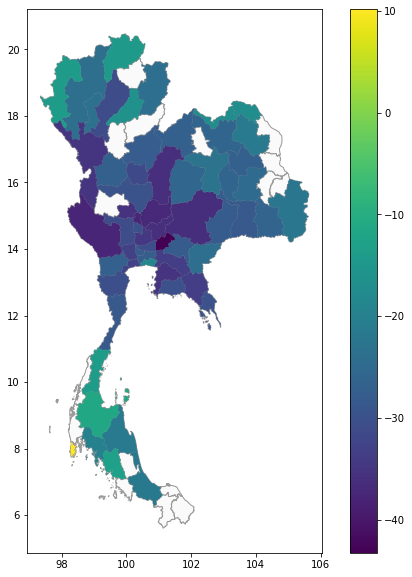

In [248]:
f, ax = plt.subplots(1,1, figsize=(10,10))
mobility_map=pd.merge(gdf, provinces_changes, left_on='PROV_NAME', right_on='province')
gdf.plot(color='#fafafa',ax=ax,edgecolor='#999')
mobility_map.plot(column='delta', cmap='viridis', ax=ax,legend=True)
f.savefig('mobility_map.svg')

In [221]:
mobility_map[mobility_map['province']=='PHUKET']

,PROV_CODE,PROV_NAMT,PROV_NAME,AREA_KM2_,geometry,province,delta
56,83,ภูเก็ต,PHUKET,553.51,"MULTIPOLYGON (((98.31437 7.47852, 98.31425 7.4...",PHUKET,10.173041
